In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("../Sample Datasets/transactions_data.csv")
data.head()

,date,month_name,calendar_week,customer_code,trans_category,country,order_no,sales_value
0,1-08-24,January,2,A141705,Machine,Thailand,AA41305050,998000.00
1,1-11-24,January,2,A149276,Machine,Singapore,AA41305027,250528.12
2,1-11-24,January,2,A111783,Machine,Malaysia,AA41305028,1446604.07
3,1-11-24,January,2,A145273,Spare part,Nigeria,AA41406867,1359395.40
4,1-12-24,January,2,A110168,Aftersales,Malaysia,AA41305034,2995.28


In [22]:
data = data.drop(["calendar_week"], axis = 1)
data.tail(3)

,date,month_name,customer_code,trans_category,country,order_no,sales_value
1017,12-24-24,December,A113262,Machine,Thailand,AA41305621,55000.0
1018,12-24-24,December,A132459,Spare part,Thailand,AA41407707,122216.4
1019,12-24-24,December,A146571,Spare part,Thailand,AA41407713,6632.0


In [23]:
data.isnull().sum()

date              0
month_name        0
customer_code     0
trans_category    0
country           0
order_no          0
sales_value       0
dtype: int64

In [24]:
data.isna().sum()

date              0
month_name        0
customer_code     0
trans_category    0
country           0
order_no          0
sales_value       0
dtype: int64

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sales_value,1020.0,269409.605912,995061.933448,0.0,18127.18,44023.26,130695.755,15000000.0


In [26]:
data[data["sales_value"] == 0.0].head()

,date,month_name,customer_code,trans_category,country,order_no,sales_value
168,3-01-24,March,A138395,Foc,Indonesia,FF42000006,0.0
203,3-14-24,March,A116260,Foc,Australia,FF42000007,0.0
304,4-25-24,April,A121218,Foc,Indonesia,FF42000003,0.0
517,7-08-24,July,A121218,Foc,Indonesia,FF42000004,0.0
782,10-01-24,October,A144005,Foc,New Zealand,FF42000000,0.0


In [27]:
data = data[data["sales_value"] > 0.0]
data.shape

(1012, 7)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1012 non-null   object 
 1   month_name      1012 non-null   object 
 2   customer_code   1012 non-null   object 
 3   trans_category  1012 non-null   object 
 4   country         1012 non-null   object 
 5   order_no        1012 non-null   object 
 6   sales_value     1012 non-null   float64
dtypes: float64(1), object(6)
memory usage: 63.2+ KB


In [29]:
data["date"] = pd.to_datetime(data["date"])
data["date"].dtype

dtype('<M8[ns]')

In [30]:
data[data["month_name"] == "January"].head(3)

,date,month_name,customer_code,trans_category,country,order_no,sales_value
0,2024-01-08,January,A141705,Machine,Thailand,AA41305050,998000.00
1,2024-01-11,January,A149276,Machine,Singapore,AA41305027,250528.12
2,2024-01-11,January,A111783,Machine,Malaysia,AA41305028,1446604.07


## Customer Distribution by Country 

Thailand       0.470356
Indonesia      0.266798
Australia      0.081028
Malaysia       0.071146
Philippines    0.053360
New Zealand    0.011858
Singapore      0.010870
Myanmar        0.010870
Italy          0.006917
Nigeria        0.004941
Tanzania       0.002964
Fiji           0.002964
Ghana          0.001976
Vietnam        0.001976
Taiwan         0.001976
Name: country, dtype: float64

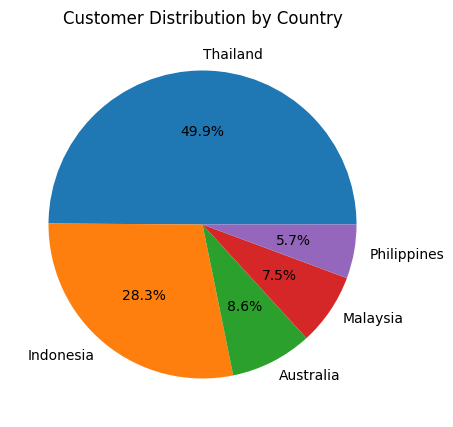

In [ ]:
display(data["country"].value_counts(normalize=True).sort_values(ascending=False))
data["country"].value_counts(ascending=False)[:9].plot(kind = 'barh')

## Monthly Sales

,sales_value
month_name,
September,53404654.38
March,37202725.82
June,31410665.62
July,23773232.40
May,22499736.16
February,20395844.61
January,18085235.87
August,16630686.55
November,15206208.01


<Axes: xlabel='month_name'>

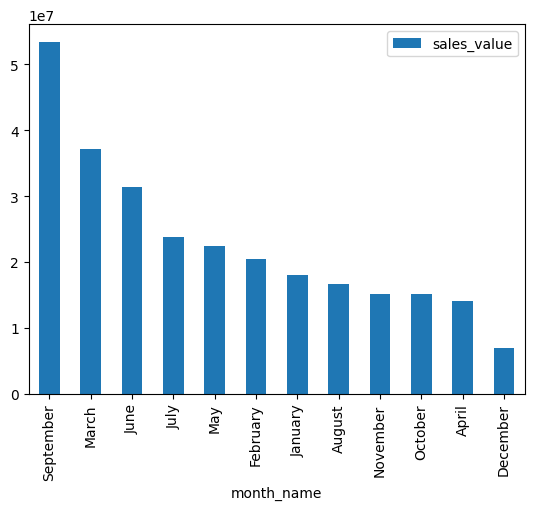

In [ ]:
df = pd.DataFrame(data.groupby("month_name")["sales_value"].sum())
df = df.sort_values('sales_value', ascending = False)
display(df)
df.plot(kind = "bar")

# df = data.groupby(["month_name"]).agg({"sales_value":"sum"}).reset_index().sort_values('sales_value', ascending=False)

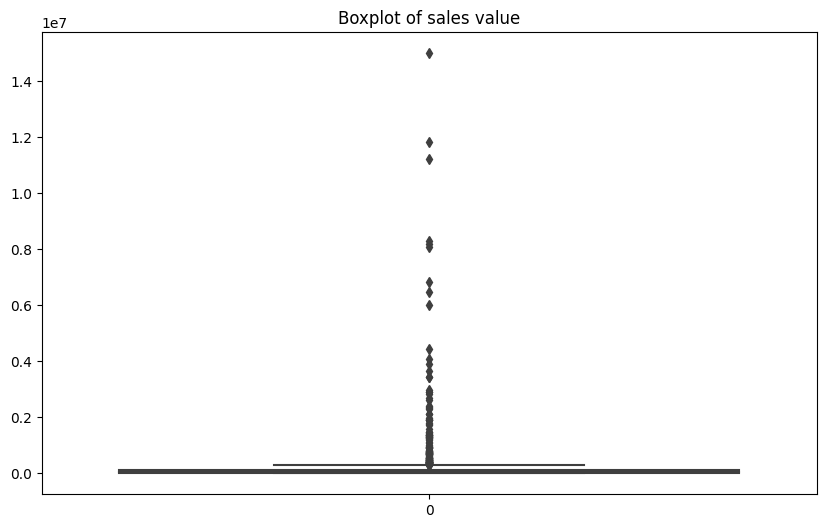

In [33]:
# outliers detection

plt.figure(figsize = (10, 6))
sns.boxplot(data["sales_value"])
plt.title("Boxplot of sales value")
plt.show()

In [34]:
# calculation IQR

Q1 = data["sales_value"].quantile(0.25)
Q3 = data["sales_value"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["sales_value"] < lower_bound) | (data["sales_value"] > upper_bound)]

In [35]:
if len(outliers) > 0:
    print("Number of outliers: {}".format(len(outliers)))
else:
    print("No outliers found.")

# Now we have minimum sales value (866.0)
# May be outlier due to typo errors or discount or wrong currency rate
# Remark: For the time being, the currency is Thai Baht

Number of outliers: 135


## RFM Model (Recency | Frequency | Monetary)

In [36]:
last_purchase_date = max(data["date"])
last_purchase_date

Timestamp('2024-12-24 00:00:00')

In [37]:
first_purchase_date = min(data["date"])
first_purchase_date

Timestamp('2024-01-08 00:00:00')

In [38]:
import datetime as dt
checked_date = dt.datetime(2024, 12, 25)
checked_date

datetime.datetime(2024, 12, 25, 0, 0)

In [39]:
RFM_Table = data.groupby("customer_code").agg({"date": lambda x:(checked_date - x.max()).days,"order_no": lambda x: x.count(), "sales_value": lambda x: x.sum()}).reset_index()
RFM_Table

,customer_code,date,order_no,sales_value
0,A100000,5,1,400301.62
1,A101708,34,12,3365420.03
2,A107587,89,3,157854.92
3,A108766,19,4,122416.47
4,A109374,5,31,2486433.88
...,...,...,...,...
267,A151961,35,1,38324.00
268,A151962,35,1,91091.00
269,A151983,26,1,2408203.51
270,A152109,5,1,1459238.00


In [41]:
RFM_Table = RFM_Table.rename(columns = {"customer_code": "Customer Code", "date": "Recency", "order_no": "Frequency", "sales_value": "Monetary"})
RFM_Table.head(3)

,Customer Code,Recency,Frequency,Monetary
0,A100000,5,1,400301.62
1,A101708,34,12,3365420.03
2,A107587,89,3,157854.92


In [42]:
RFM_Table["R_score"] = RFM_Table["Recency"].rank(ascending=False)
RFM_Table["F_score"] = RFM_Table["Frequency"].rank(ascending=True)
RFM_Table["M_score"] = RFM_Table["Monetary"].rank(ascending=True)

RFM_Table.head(3)

,Customer Code,Recency,Frequency,Monetary,R_score,F_score,M_score
0,A100000,5,1,400301.62,265.5,57.0,179.0
1,A101708,34,12,3365420.03,217.5,260.5,253.0
2,A107587,89,3,157854.92,140.5,184.0,133.0


In [43]:
RFM = RFM_Table.copy()

In [46]:
RFM["R"] = (RFM["R_score"]/RFM["R_score"].max())*100
RFM["F"] = (RFM["F_score"]/RFM["F_score"].max())*100
RFM["M"] = (RFM["M_score"]/RFM["M_score"].max())*100

RFM = RFM.round(2)
RFM.head(3)

,Customer Code,Recency,Frequency,Monetary,R_score,F_score,M_score,R,F,M
0,A100000,5,1,400301.62,265.5,57.0,179.0,97.97,20.96,65.81
1,A101708,34,12,3365420.03,217.5,260.5,253.0,80.26,95.77,93.01
2,A107587,89,3,157854.92,140.5,184.0,133.0,51.85,67.65,48.90


In [47]:
RFM["RFM_Value"] = 0.20 * RFM["R"] + 0.30 * RFM["F"] + 0.50 * RFM["M"]
RFM.head(3)

,Customer Code,Recency,Frequency,Monetary,R_score,F_score,M_score,R,F,M,RFM_Value
0,A100000,5,1,400301.62,265.5,57.0,179.0,97.97,20.96,65.81,58.787
1,A101708,34,12,3365420.03,217.5,260.5,253.0,80.26,95.77,93.01,91.288
2,A107587,89,3,157854.92,140.5,184.0,133.0,51.85,67.65,48.90,55.115


In [49]:
q1 = RFM["RFM_Value"].quantile(q = [0.25, 0.50, 0.75])
q1

0.25    31.5910
0.50    49.5935
0.75    67.7710
Name: RFM_Value, dtype: float64

In [50]:
q2 = RFM["RFM_Value"].quantile(q = [0.20, 0.60, 0.80])
q2

0.2    26.5216
0.6    57.2764
0.8    71.5642
Name: RFM_Value, dtype: float64

<Axes: xlabel='RFM_Value', ylabel='Proportion'>

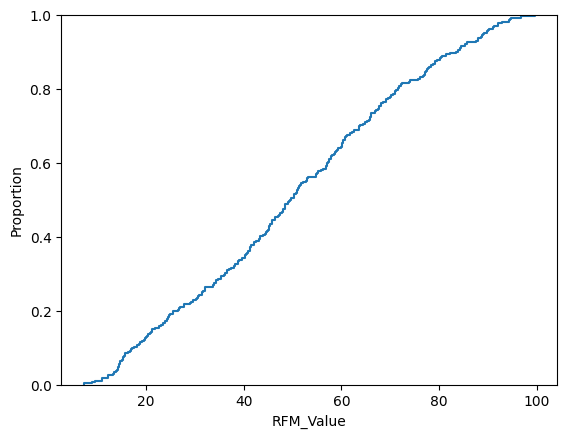

In [51]:
sns.ecdfplot(data = RFM["RFM_Value"])

In [54]:
print("Min RFM Value: ", min(RFM["RFM_Value"]))
print("Max RFM Value: ", max(RFM["RFM_Value"]))

Min RFM Value:  7.28
Max RFM Value:  99.594


In [56]:
def cust_segment(x, quantile):
	if x <= quantile[0.25]:
		return "Silver"
	elif x <= quantile[0.50]: 
		return "Gold"
	elif x <= quantile[0.75]:
		return "Diamond"
	else:
		return "Platinum"

In [58]:
RFM["Loyality"] = RFM["RFM_Value"].apply(lambda x: cust_segment(x, q1))
RFM.tail(5)

,Customer Code,Recency,Frequency,Monetary,R_score,F_score,M_score,R,F,M,RFM_Value,Loyality
267,A151961,35,1,38324.00,214.5,57.0,64.0,79.15,20.96,23.53,33.883,Gold
268,A151962,35,1,91091.00,214.5,57.0,111.0,79.15,20.96,40.81,42.523,Gold
269,A151983,26,1,2408203.51,233.0,57.0,245.0,85.98,20.96,90.07,68.519,Platinum
270,A152109,5,1,1459238.00,265.5,57.0,228.0,97.97,20.96,83.82,67.792,Platinum
271,A203143,237,1,18219.22,39.0,57.0,30.0,14.39,20.96,11.03,14.681,Silver


In [60]:
RFM["Loyality"].value_counts().sort_values(ascending=True)

Diamond     68
Platinum    68
Silver      68
Gold        68
Name: Loyality, dtype: int64

## K-Means Clustering

In [93]:
new_data = RFM["RFM_Value"]
new_data = pd.DataFrame(new_data)
new_data.head(3)

,RFM_Value
0,58.787
1,91.288
2,55.115


### Method 1: Elbow Method

In [64]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [65]:
n_clusters = range(2, 11)
inertia_values = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(new_data)
    inertia_values.append(kmeans.inertia_)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

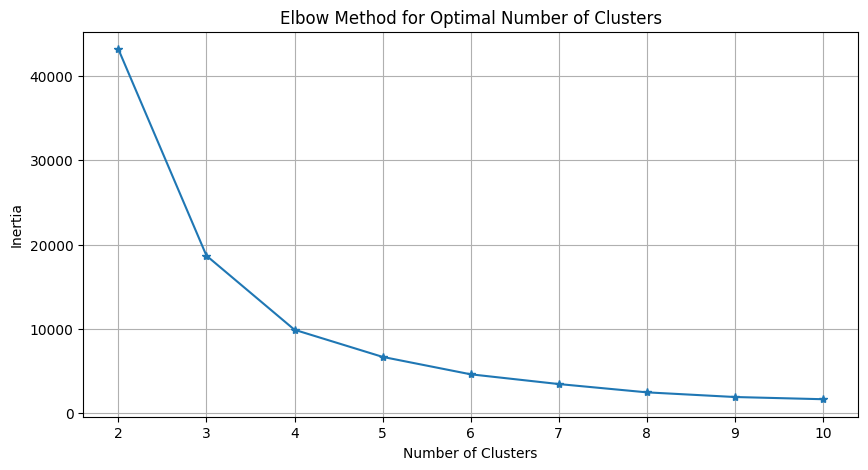

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, inertia_values, marker = '*')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# The optimal number of clusters would be 4.

### Method 2: Silhouette Method

In [94]:
from sklearn.metrics import silhouette_score

In [95]:
n_clusters = range(2, 11)
silhouette_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters = n, random_state = 42)
    cluster_labels = kmeans.fit_predict(new_data)
    silhouette_avg = silhouette_score(new_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

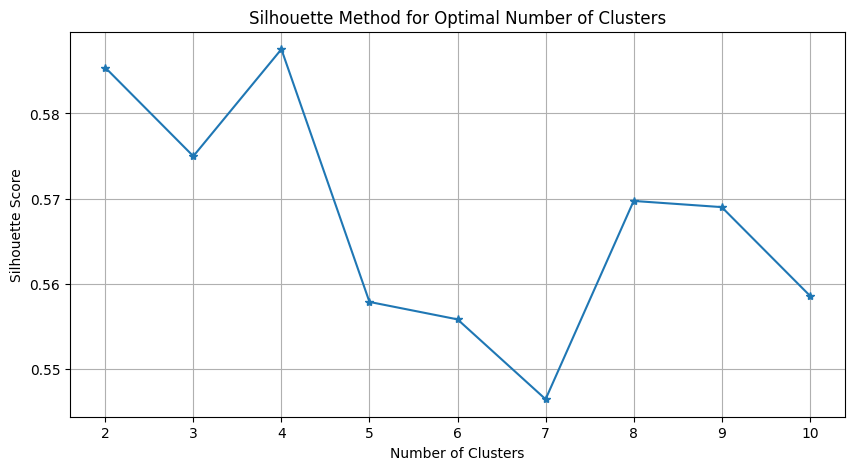

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(n_clusters, silhouette_scores, marker = '*')
plt.title("Silhouette Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# The silhouette score is highest when the number of clusters is 4.

### Applying Cluster

In [97]:
kmeans_cluster = KMeans(max_iter = 200, random_state = 100, n_clusters = 4)
y_means = kmeans_cluster.fit_predict(new_data)
y_means

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 0, 3, 3, 0, 3, 2, 0, 0, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 3, 0, 1, 1, 3, 0, 3, 0, 3, 3, 3, 1, 3, 2, 0, 0,
       2, 0, 1, 0, 1, 2, 1, 3, 0, 2, 2, 3, 2, 1, 1, 3, 1, 3, 1, 2, 2, 0,
       2, 2, 0, 1, 2, 0, 3, 1, 3, 1, 0, 0, 2, 3, 3, 2, 2, 2, 2, 0, 3, 1,
       3, 1, 2, 3, 1, 3, 0, 0, 2, 1, 1, 0, 1, 3, 3, 2, 3, 3, 2, 0, 2, 1,
       1, 1, 1, 3, 2, 1, 0, 2, 1, 1, 3, 3, 3, 2, 3, 2, 3, 1, 0, 1, 2, 3,
       1, 1, 1, 3, 1, 3, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 3, 0, 2, 1, 3,
       2, 0, 2, 2, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 2, 0, 3, 2, 3, 0, 2,
       1, 3, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 3, 2, 3, 2, 0, 3,
       2, 1, 1, 2, 2, 3, 3, 0, 1, 1, 3, 1, 3, 0, 2, 1, 2, 0, 1, 2, 3, 0,
       2, 0, 3, 3, 3, 2, 3, 1, 3, 0, 2, 1, 2, 1, 1, 3, 0, 1, 3, 2, 3, 2,
       2, 3, 3, 2, 1, 1, 2, 0, 3, 1, 1, 2, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1,
       3, 3, 0, 1, 1, 3, 3, 2])

In [100]:
RFM["Cluster"] = kmeans_cluster.labels_
RFM.tail(5)

,Customer Code,Recency,Frequency,Monetary,R_score,F_score,M_score,R,F,M,RFM_Value,Loyality,Cluster
267,A151961,35,1,38324.00,214.5,57.0,64.0,79.15,20.96,23.53,33.883,Gold,1
268,A151962,35,1,91091.00,214.5,57.0,111.0,79.15,20.96,40.81,42.523,Gold,1
269,A151983,26,1,2408203.51,233.0,57.0,245.0,85.98,20.96,90.07,68.519,Platinum,3
270,A152109,5,1,1459238.00,265.5,57.0,228.0,97.97,20.96,83.82,67.792,Platinum,3
271,A203143,237,1,18219.22,39.0,57.0,30.0,14.39,20.96,11.03,14.681,Silver,2


In [99]:
RFM["Cluster"].value_counts()

1    81
2    72
3    71
0    48
Name: Cluster, dtype: int64

In [ ]:
labels = kmeans_cluster.labels_
silhouette_score(new_data, labels)

# The silhouette score range is from -1 to +1, the result (0.5875328841994448) indicates moderate clustering quality. (Not too good - Not too bad)

0.5875328841994448

## Finding Customer Lifetime Value (CLTV)

How much a customer is expected to contribute in revenue over their lifespan as a customer.

In [122]:
CLTV_Table = RFM_Table.copy()

In [123]:
CLTV_Table["Avg_order_value"] = CLTV_Table["Monetary"]/CLTV_Table["Frequency"]
CLTV_Table.head(3)

,Customer Code,Recency,Frequency,Monetary,R_score,F_score,M_score,Avg_order_value
0,A100000,5,1,400301.62,265.5,57.0,179.0,400301.620000
1,A101708,34,12,3365420.03,217.5,260.5,253.0,280451.669167
2,A107587,89,3,157854.92,140.5,184.0,133.0,52618.306667


In [124]:
purchase_frequency = sum(CLTV_Table["Frequency"])/CLTV_Table.shape[0]
purchase_frequency

3.7205882352941178

In [125]:
return_rate = CLTV_Table[CLTV_Table["Frequency"] > 1].shape[0]/CLTV_Table.shape[0]
return_rate

0.5845588235294118

In [126]:
churn_rate = 1 - return_rate
churn_rate

0.4154411764705882

In [127]:
CLTV_Table["Profit_margin"] = CLTV_Table["Monetary"] * 0.20
CLTV_Table.head(3)

,Customer Code,Recency,Frequency,Monetary,R_score,F_score,M_score,Avg_order_value,Profit_margin
0,A100000,5,1,400301.62,265.5,57.0,179.0,400301.620000,80060.324
1,A101708,34,12,3365420.03,217.5,260.5,253.0,280451.669167,673084.006
2,A107587,89,3,157854.92,140.5,184.0,133.0,52618.306667,31570.984


In [128]:
CLTV_Table["CLTV"] = CLTV_Table["Avg_order_value"]*purchase_frequency/churn_rate
CLTV_Table["CLTV"].round(2)
CLTV_Table.head(3)

,Customer Code,Recency,Frequency,Monetary,R_score,F_score,M_score,Avg_order_value,Profit_margin,CLTV
0,A100000,5,1,400301.62,265.5,57.0,179.0,400301.620000,80060.324,3.585002e+06
1,A101708,34,12,3365420.03,217.5,260.5,253.0,280451.669167,673084.006,2.511656e+06
2,A107587,89,3,157854.92,140.5,184.0,133.0,52618.306667,31570.984,4.712365e+05
